In [1]:
# Separating passengers into groups using MeanShift Clustering

In [4]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
#from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift()

In [7]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [8]:
original_df['cluster_group']=np.nan

In [9]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

C:\Users\kpuni\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.37250199840127896, 1: 0.6590909090909091, 2: 1.0, 3: 0.1, 4: 1.0}


In [11]:
# is classifies the passengers 

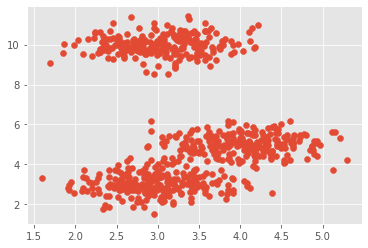

In [13]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs
centers = [[3,3,3],[4,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 700, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

[[4.03104973 4.99406262 5.01584362]
 [3.04477464 9.99171536 9.98593078]
 [2.94570611 3.00344009 2.9586522 ]]
Estimated clusters: 3


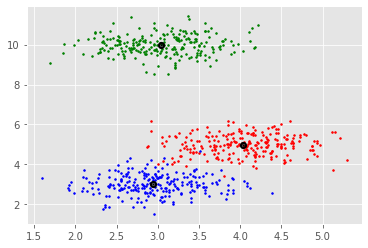

In [14]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()